In [1]:
# Choosing a right threshold probablity value will help us to classify better 
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as tts

In [18]:
data = pd.read_excel(r'D:\ERA_ML\IIT Roorkee\Dataset\week_8\Week 8 (Important Data)-20220425T104320Z-001\Week 8 (Important Data)\Simmons.xls')
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [19]:
data.describe() #it is used to get some statistical detail

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


Since card and coupon are nominal/categorical value mean std doesnt give a practical meaning. Dont refer for any statistics 

In [20]:
data['Coupon'].unique() # It gives unique value in perticular column

array([0, 1], dtype=int64)

In [21]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In our sample, We find 60 persons have used the coupon whereas 40 has nor used 

In [24]:
x = data[['Card','Spending']]
y = data['Coupon']
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state = 42)
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

Out of 100 sample observations , 75 observations has been taken for training the model, and 25 for testing purpose

In [27]:
# Fit the model 

Lreg = LogReg(solver='lbfgs') 
Lreg.fit(x_train, y_train) #ravel() will return 1D array with all the input-array elements

LogisticRegression()

In [32]:
# Predict the values of dependent variable using test and training set of independent variable


y_predict_test = Lreg.predict(x_test)
print('Prediction for test dataset ',y_predict_test)


y_predict_train = Lreg.predict(x_train)
print('Prediction for train dataset ',y_predict_train)

Prediction for test dataset  [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0]
Prediction for train dataset  [0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0]


In [ ]:
# The training prediction has 75 outputs 
# The test prediction has 25 outputs 


In [36]:
# Predict probablity of being 1 

y_prob_1 = Lreg.predict_proba(x_train) 
print(y_prob_1)
# we are slicing to get only the probablity of being 1
y_prob_train = y_prob_1[:,1] 
y_prob_train.reshape(1,-1)


[[0.50377883 0.49622117]
 [0.67119207 0.32880793]
 [0.55670886 0.44329114]
 [0.66679076 0.33320924]
 [0.58543535 0.41456465]
 [0.67109671 0.32890329]
 [0.6024957  0.3975043 ]
 [0.33078771 0.66921229]
 [0.74155469 0.25844531]
 [0.36327628 0.63672372]
 [0.70725614 0.29274386]
 [0.71533026 0.28466974]
 [0.4840704  0.5159296 ]
 [0.58007724 0.41992276]
 [0.75657644 0.24342356]
 [0.471486   0.528514  ]
 [0.52034893 0.47965107]
 [0.47194211 0.52805789]
 [0.66808551 0.33191449]
 [0.72542565 0.27457435]
 [0.50820704 0.49179296]
 [0.36738384 0.63261616]
 [0.75309819 0.24690181]
 [0.52910548 0.47089452]
 [0.72157924 0.27842076]
 [0.58336125 0.41663875]
 [0.63844398 0.36155602]
 [0.50029673 0.49970327]
 [0.76378364 0.23621636]
 [0.62139948 0.37860052]
 [0.51190677 0.48809323]
 [0.71122123 0.28877877]
 [0.71436141 0.28563859]
 [0.62768118 0.37231882]
 [0.34690258 0.65309742]
 [0.56192736 0.43807264]
 [0.66361522 0.33638478]
 [0.59593393 0.40406607]
 [0.76568823 0.23431177]
 [0.62717616 0.37282384]


array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [37]:
# Doing the same with test data 

y_prob = Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [38]:
x = data[['Spending', 'Card']]
y = data['Coupon']

import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 May 2022   Pseudo R-squ.:                  0.1012
Time:                        06:56:43   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

https://medium.datadriveninvestor.com/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f

# Checking the accuracy of the model with test data 


In [40]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_predict)
print('The accuracy of the model is ', score)

The accuracy of the model is  0.76


In [44]:
# confusion matrix 

from sklearn.metrics import confusion_matrix
print('Confusion matrix \n' , confusion_matrix(y_test, y_predict),'\n')


tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Confusion matrix 
 [[15  1]
 [ 5  4]] 

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [45]:
# Classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict)) 


              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



#Recall gives us an idea about when it’s actually yes, how often does it predict yes.<br>
#Precsion tells us about when it predicts yes, how often is it correct<br>
#Precision = tp / (tp + fp), for 1<br>
#Accuracy = (tp + tn) / (tp + tn + fp + fn)<br>
#Recall=tp / (tp + fn), for 1<br>
#Fmeasure=(2*Recall*Precision)/(Recall+Presision)<br>

Harmonic mean of Precision & Recall is used to indicate a balance between Precision &<br>Recall providing each equal weightage, it ranges from 0 to 1. F1 Score reaches<br> its best value at 1 (perfect precision & recall) and worst at 0, read more here.

In [61]:

# Recall for 1 --> True positive rate or SENSITIVITY
# Recall gives us an idea about when it’s actually positive, how often does it predict positive.
Recall_1 = tp/ (tp+fn)
print("Sensitivity or Recall for 1 : {:0.2f}".format(Recall_1))

# Recall for 0 --> True negative rate or SPECIFICITY
# Recall gives us an idea about when it’s actually negative, how often does it predict negative.
Recall_0 = tn/(tn+fp)
print("Specificity or Recall for 0 : {:0.2f}".format(Recall_0))


#Precision for 1
# How much actual positive out of all positivites we got from test
Precision_1 = tp / (tp + fp)
print('Precision_1: ', Precision_1)


#Precision for 0 
# How much actual negative out of all negatives we got from test
Precision_0 = tn / (tn + fn)
print('Precision_0: ', Precision_0)


Sensitivity or Recall for 1 : 0.44
Specificity or Recall for 0 : 0.94
Precision_1:  0.8
Precision_0:  0.75


In [59]:
# Accuracy 

Accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


In [62]:
# F score for 1 

Fmeasure_1=(2*Recall_1*Precision_1)/(Recall_1+Precision_1)
Fmeasure_1

0.5714285714285714

## ROC CURVE  with train data

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1 = roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1= roc_curve(y_train, y_prob_train)
df = pd.DataFrame({'fpr':fpr1,'tpr':tpr1,'thresholds1':thresholds1})
print(df)
roc_auc1 = auc(fpr1, tpr1)
df

,fpr,tpr,thresholds1
0,0.000000,0.000000,1.674641
1,0.000000,0.032258,0.674641
2,0.000000,0.096774,0.657100
3,0.022727,0.096774,0.653097
4,0.022727,0.322581,0.528514
5,0.090909,0.322581,0.509777
6,0.113636,0.354839,0.499703
7,0.113636,0.387097,0.496517
8,0.136364,0.387097,0.496221
9,0.136364,0.483871,0.488093


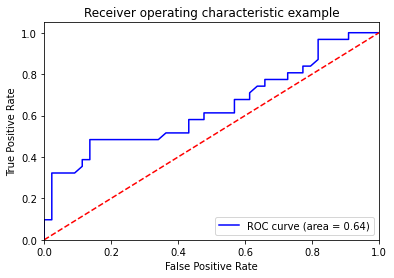

In [65]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ROC Curve with test data 

In [67]:
log_ROC_AUC = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

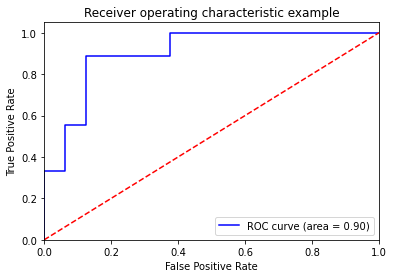

In [68]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##### You can see the AUC for test data is 0.9 and for the train data it is 0.64. 

##### Our model works well with test data.

# Find the optimal threshold value 

The earlier predictions were based on the default thereshold value 0.5. We can change it to see how the AUC is improved 


### Case 1 : Threshold  = 0.35

In [70]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1), threshold=0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [71]:
#converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [72]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [73]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_class1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  8
False Positives:  8
False Negatives:  0
True Positives:  9


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



  #### Interpretation 
  
  Sensitivity is 1 that means it predicts all actual positive <br>
 
  **Sensitivity gives us an idea about when it’s actually positive, how often does it predict positive.
  
  Specificity is 0.5 that means it predicts half  of the actual negative<br>
  
  **Specificity gives us an idea about when it’s actually negative, how often does it predict negative.



### Case 2 : Threshold  = 0.5

In [78]:
from sklearn.preprocessing import binarize
y_predict_class2 = binarize(y_prob.reshape(1,-1),threshold= 0.50)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [76]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



### Case 2 : Threshold  = 0.70

In [79]:
from sklearn.preprocessing import binarize
y_predict_class3 = binarize(y_prob.reshape(1,-1), threshold = 0.70)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
confusion_matrix_4 = confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\Z028726\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z028726\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z028726\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### interpretation 

when we increase the threshold from 0.35 to 0.7 

Sensitivity is decreasing and Specificity is increasing 



# Optimal threshold value 

In [84]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.902778


##### This is the max ROC we can obtain in this model for the given data 
##### Have to find for which threshold value we get the max AUC 

In [85]:
import numpy as np
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), 
                    '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 
                    'thresholds' : pd.Series(thresholds, index = i)})

roc


,fpr,tpr,1-fpr,tf,thresholds
0,0.0000,0.000000,1.0000,-1.000000,1.685219
1,0.0000,0.111111,1.0000,-0.888889,0.685219
2,0.0000,0.333333,1.0000,-0.666667,0.565806
3,0.0625,0.333333,0.9375,-0.604167,0.528029
4,0.0625,0.555556,0.9375,-0.381944,0.495167
5,0.1250,0.555556,0.8750,-0.319444,0.470733
6,0.1250,0.666667,0.8750,-0.208333,0.469524
7,0.1250,0.888889,0.8750,0.013889,0.457033
8,0.3750,0.888889,0.6250,0.263889,0.428365
9,0.3750,1.000000,0.6250,0.375000,0.423611


In [88]:
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


# optimal threshold value is : 0.457 

[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, ''),
 Text(12.0, 0, ''),
 Text(14.0, 0, '')]

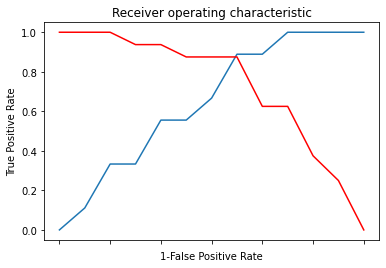

In [89]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [91]:
from sklearn.preprocessing import binarize
y_predict_class4 = binarize(y_prob.reshape(1,-1), threshold = 0.45)[0]
y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [92]:
confusion_matrix_5 = confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



# Interpretation 

Accuracy is 0.88
Sensitivity : 0.89 
Specificity : 0.88 

